In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS #used to generate world cloud

### Loading Movies and Ratings Data

In [277]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

#### Sorting Movies & Ratings by movieId

In [278]:
#Sorting
movies.sort_values('movieId',inplace=True)
ratings.sort_values('movieId',inplace=True)
ratings.head()

,userId,movieId,rating,timestamp
2001185,13334,1,5.0,832023973
10627899,69000,1,4.0,1564248795
4075778,26803,1,3.5,1106468113
19245863,124893,1,3.5,1173048946
21816622,141835,1,3.5,1558539488


### Reseting the Index of Ratings & Movies  after sorting

In [279]:
movies.reset_index(inplace=True,drop=True)
ratings.reset_index(inplace=True,drop=True)
ratings.head()

,userId,movieId,rating,timestamp
0,13334,1,5.0,832023973
1,69000,1,4.0,1564248795
2,26803,1,3.5,1106468113
3,124893,1,3.5,1173048946
4,141835,1,3.5,1558539488


#### Spliting movie title and release year in seperate columns

In [280]:
movies['year']= movies.title.str.extract("\((\d{4})\)",expand =True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


#### Converting year column to timestamp

In [281]:
movies['year'] = pd.to_datetime(movies['year'], format='%Y')

In [282]:
movies['year'] = movies['year'].dt.year

In [283]:
movies.tail()

,movieId,title,genres,year
62418,209157,We (2018),Drama,2018.0
62419,209159,Window of the Soul (2001),Documentary,2001.0
62420,209163,Bad Poems (2018),Comedy|Drama,2018.0
62421,209169,A Girl Thing (2001),(no genres listed),2001.0
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,1962.0


#### Removing year from the movie title

In [284]:
movies['title'] = movies['title'].str[:-7]
movies.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995.0
1,2,Jumanji,Adventure|Children|Fantasy,1995.0
2,3,Grumpier Old Men,Comedy|Romance,1995.0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995.0
4,5,Father of the Bride Part II,Comedy,1995.0


## List of Unique Genres

In [289]:
unique_genres = pd.DataFrame(movies['genres'].str.split('|').tolist()).stack().unique()

In [290]:
unique_genres = pd.DataFrame(unique_genres, columns=['genre'])
unique_genres

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


### Frequency of each Genre

In [291]:
genres = {} #create an empty dictionary

for x in unique_genres['genre']: #loop on unique_genre
    for y in movies['genres']:   #loop on genre column of movies dataset
        z = y.split('|')         #split column into list
        if x in z:               #check if the unique_genre is present in the movies[genre]
            if x in genres:      #check if the genre already exists in the dictionary
                genres[x] +=1
            else:
                genres[x] = 1

In [292]:
genres

{'Adventure': 4145,
 'Animation': 2929,
 'Children': 2935,
 'Comedy': 16870,
 'Fantasy': 2731,
 'Romance': 7719,
 'Drama': 25606,
 'Action': 7348,
 'Crime': 5319,
 'Thriller': 8654,
 'Horror': 5989,
 'Mystery': 2925,
 'Sci-Fi': 3595,
 'IMAX': 195,
 'Documentary': 5605,
 'War': 1874,
 'Musical': 1054,
 'Western': 1399,
 'Film-Noir': 353,
 '(no genres listed)': 5062}

## WordCloud of Movie Genre

In [302]:
stopwords = set(STOPWORDS)

def mywordcloud(data, title=None):
    wordcloud = WordCloud(
    background_color = 'black',
    stopwords = stopwords,
    #max_words = 1000,
    relative_scaling = 0.5,
    #color_func= callable,
    normalize_plurals=False
    ).generate_from_frequencies(data)
    
    fig = plt.figure(1,figsize=(10,10))
    plt.axis('off')
    if title:
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show

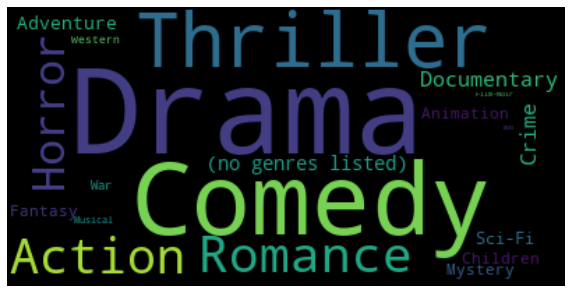

In [303]:
mywordcloud(genres)

#### Converting Genre Dictionary into DataFrame

In [304]:
moviegenre = pd.DataFrame(list(genres.items()),columns=['genre','counts'])
moviegenre.head()

,genre,counts
0,Adventure,4145
1,Animation,2929
2,Children,2935
3,Comedy,16870
4,Fantasy,2731


#### Checking null values

In [81]:
moviesNan = movies[movies['year'].isna()]
moviesNan.head()

,movieId,title,genres,year
15036,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaT
25387,123619,Terrible Joe Moran,(no genres listed),NaT
26284,125571,The Court-Martial of Jackie Robinson,(no genres listed),NaT
26309,125632,In Our Garden,(no genres listed),NaT
26392,125958,Stephen Fry In America - New World,(no genres listed),NaT


#### There are some NaN values in year Columns

In [82]:
movies.count()

movieId    62423
title      62423
genres     62423
year       62013
dtype: int64

#### There are null values in year column. Let's drop null rows

In [83]:
movies = movies.dropna()

In [84]:
movies.count()

movieId    62013
title      62013
genres     62013
year       62013
dtype: int64

In [85]:
movies.isnull().any()

movieId    False
title      False
genres     False
year       False
dtype: bool

In [201]:
import datetime as dt

In [202]:
from datetime import datetime

#### Converting Timestamp to readable Date Format

In [206]:
ratings['timestamp'] = [datetime.fromtimestamp(x) for x in ratings['timestamp']]


TypeError: an integer is required (got type Timestamp)

In [207]:
ratings['timestamp'] = ratings['timestamp'].dt.year
ratings.head()

,userId,movieId,rating,timestamp
0,13334,1,5.0,1996
1,69000,1,4.0,2019
2,26803,1,3.5,2005
3,124893,1,3.5,2007
4,141835,1,3.5,2019
